In [1]:
import numpy as np
import pandas as pd
import os
import time
import random
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

from glob import glob
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from skimage.feature import hog

import PIL
import cv2
import pickle

In [2]:
car_paths = glob("images/data/train"+"/*")
neg_paths = glob("images/data/test"+"/*")        
print("There are {} car images in the dataset".format(len(car_paths)))
print("There are {} negative images in the dataset".format(len(neg_paths)))

There are 3599 car images in the dataset
There are 853 negative images in the dataset


In [3]:
# Extracting the HOG features of the images
pos_images = []
neg_images = []

pos_labels = np.ones(len(car_paths))
neg_labels = np.zeros(len(neg_paths))

start = time.time()

for car_path in car_paths:    
    img = np.asarray(PIL.Image.open(car_path))
    # We don't have to use RGB channels to extract features, Grayscale is enough.
    img = cv2.cvtColor(cv2.resize(img,(128,64)),cv2.COLOR_RGB2GRAY)
    img = hog(img,orientations=9,pixels_per_cell=(16,16),
              cells_per_block=(2,2)
             )
    
    pos_images.append(img)

for neg_path in neg_paths:
    img = np.asarray(PIL.Image.open(neg_path))
    img = cv2.cvtColor(cv2.resize(img,(128,64)),cv2.COLOR_RGB2GRAY)
    img = hog(img,orientations=9,pixels_per_cell=(16,16),
              cells_per_block=(2,2)
             )
    
    neg_images.append(img)
    
x = np.asarray(pos_images + neg_images)
y = np.asarray(list(pos_labels) + list(neg_labels))
    
processTime = round(time.time()-start,2)
print("Reading images and extracting features has taken {} seconds".format(processTime))

print("Shape of image set",x.shape)
print("Shape of labels",y.shape)

Reading images and extracting features has taken 40.03 seconds
Shape of image set (4452, 756)
Shape of labels (4452,)


In [4]:
#Spliting into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(3561, 756)
(891, 756)
(3561,)
(891,)


In [5]:
#Building/Training the SVM classifier
from sklearn.svm import SVC

# Creating a SVC object
svc = SVC(kernel = 'rbf', verbose=True, random_state=42)

# Fit the training dataset
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)
print("Accuracy score of model is ",round(accuracy_score(y_pred=y_pred,y_true=y_test)*100, 2))

[LibSVM]Accuracy score of model is  96.86


In [6]:
# testing
def test_prediction(img_path, true_label, svc):
    img = np.asarray(PIL.Image.open(img_path))
    img_gray = cv2.cvtColor(cv2.resize(img,(128,64)),cv2.COLOR_RGB2GRAY)
    image, viz = hog(img_gray,orientations=9,pixels_per_cell=(16,16),
              cells_per_block=(2,2), visualize=True)
        
    x_tst = np.asarray(image)
    pred = svc.predict([x_tst])
    
    print("True label: ", true_label)
    plt.imshow(img)
    if pred[0] == 0.0:
        print("Prediction: Not car")
        
    elif pred[0] == 1.0:
        print("Prediction: Car")

True label:  Not car
Prediction: Not car


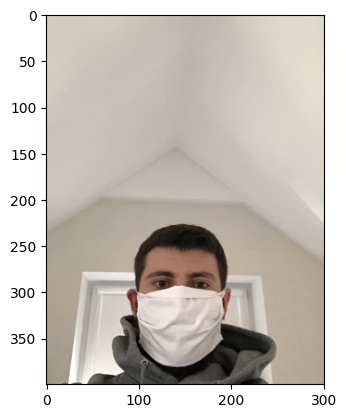

In [7]:
test_prediction(neg_paths[2], "Not car", svc)

True label:  Car
Prediction: Car


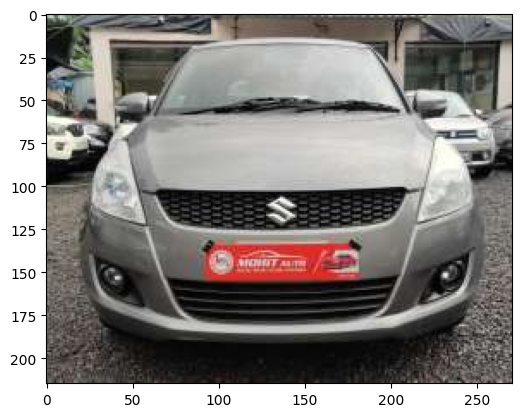

In [15]:
test_prediction(car_paths[7], "Car", svc)